# Group Details (Group No - 218)

- **Aakash Goel** - 2021fc04277
- **Pulkit** -
- **Neha** -

# Assignment dataset
- Housing Price Prediction


### STEP 01:  Import Libraries/Dataset

In [1]:
# Import the required libraries
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading USA Housing dataset
df_usa_housing = pd.read_csv('../../data/USA_Housing.csv')

### STEP 02: Data Visualization and Exploration [1M]

In [23]:
# Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them
print("Below are Sample 2 rows of Dataframe:")
display(df_usa_housing.head(2))
print("No of rows: {} and No of columns: {}".format(df_usa_housing.shape[0],df_usa_housing.shape[1]))
print("Column Names: {}".format(list(df_usa_housing.columns)))
print("Below are datatype of each column:")
display(df_usa_housing.dtypes)

Below are Sample 2 rows of Dataframe:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


No of rows: 5000 and No of columns: 7
Column Names: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
Below are datatype of each column:


Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

Class Imbalance problem appears in classification problem. In our assignment, its regression problem as targetvariable is continuous in nature. However, we can check distribution of Target variable i.e. `price` in our case


count      5000.00
mean    1232072.65
std      353117.63
min       15938.66
50%     1232669.38
75%     1471210.20
80%     1532652.29
85%     1595741.04
90%     1684620.95
95%     1813570.38
max     2469065.59
Name: Price, dtype: float64

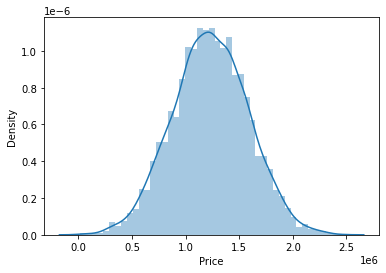

Skewness: -0.002718
Kurtosis: -0.054918


In [36]:
# Comment on class imbalance with appropriate visualization method.
print("Class Imbalance problem appears in classification problem. In our assignment, its regression problem as target\
variable is continuous in nature. However, we can check distribution of Target variable i.e. `price` in our case")
display(df_usa_housing['Price'].describe(percentiles=[0.75,0.80,0.85,0.90,0.95]))

sns.distplot(df_usa_housing['Price'])
plt.show()

#skewness and kurtosis
print("Skewness: %f" % df_usa_housing['Price'].skew())
print("Kurtosis: %f" % df_usa_housing['Price'].kurt())

In [37]:
# 3. Provide appropriate visualizations to get an insight about the dataset.

In [40]:
def scatter_plot_num_var(df,col1,col2):
    data = pd.concat([df[col1], df[col2]], axis=1)
    data.plot.scatter(x=col2, y=col1)

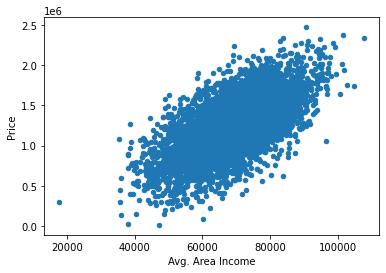

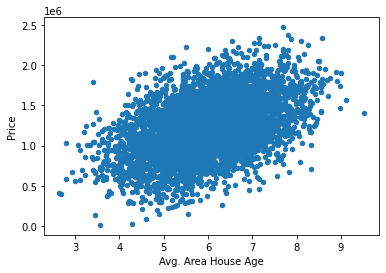

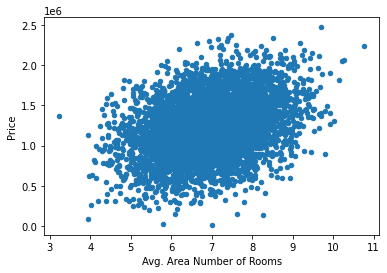

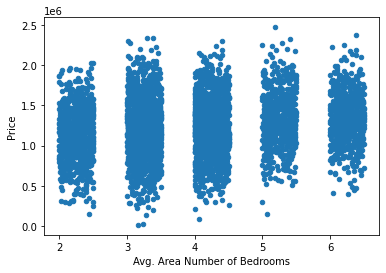

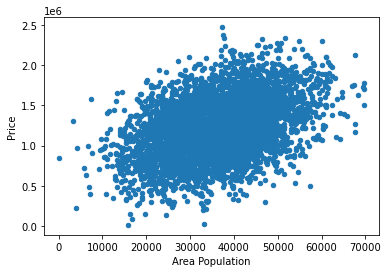

In [44]:
#scatter plot Avg. Area Income/price
scatter_plot_num_var(df = df_usa_housing, col1 = 'Price', col2 = 'Avg. Area Income')
#scatter plot Avg. Area House Age/price
scatter_plot_num_var(df = df_usa_housing, col1 = 'Price', col2 = 'Avg. Area House Age')
#scatter plot 'Avg. Area Number of Rooms'/price
scatter_plot_num_var(df = df_usa_housing, col1 = 'Price', col2 = 'Avg. Area Number of Rooms')
#scatter plot 'Avg. Area Number of Bedrooms'/price
scatter_plot_num_var(df = df_usa_housing, col1 = 'Price', col2 = 'Avg. Area Number of Bedrooms')
#scatter plot 'Area Population'/price
scatter_plot_num_var(df = df_usa_housing, col1 = 'Price', col2 = 'Area Population')

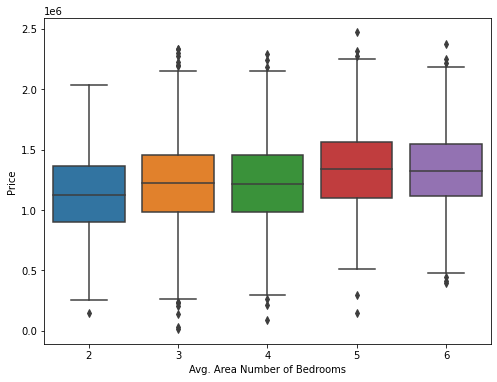

In [47]:
#box plot overallqual/Price
var = 'Avg. Area Number of Bedrooms'
data = pd.concat([df_usa_housing['Price'], df_usa_housing[var].astype(int)], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Price", data=data)
# fig.axis(ymin=0, ymax=800000);

In [ ]:
# Do the correlational analysis on the dataset. Provide a visualization for the
# same. Will this correlational analysis have effect on feature selection that you
# will perform in the next step? Justify your answer. Answer without justification
# will not be awarded marks

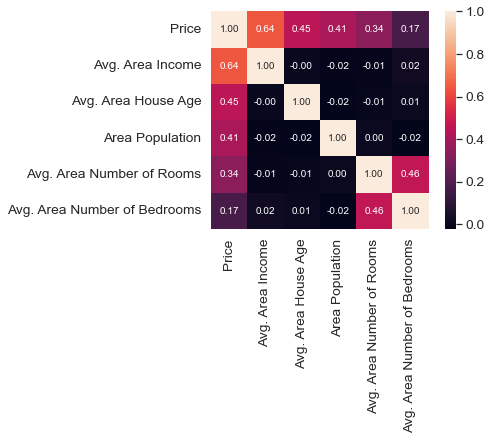

In [58]:
corrmat = df_usa_housing.corr()
k = 10 #number of variables for heatmap
cols= corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_usa_housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 'Avg. Area Income', 'Avg. Area House Age', 'Area Population' are strongly correlated with 'Price'.
- 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms' are having good correlation, Need to remove one of them to avoid multi-collinearity issue

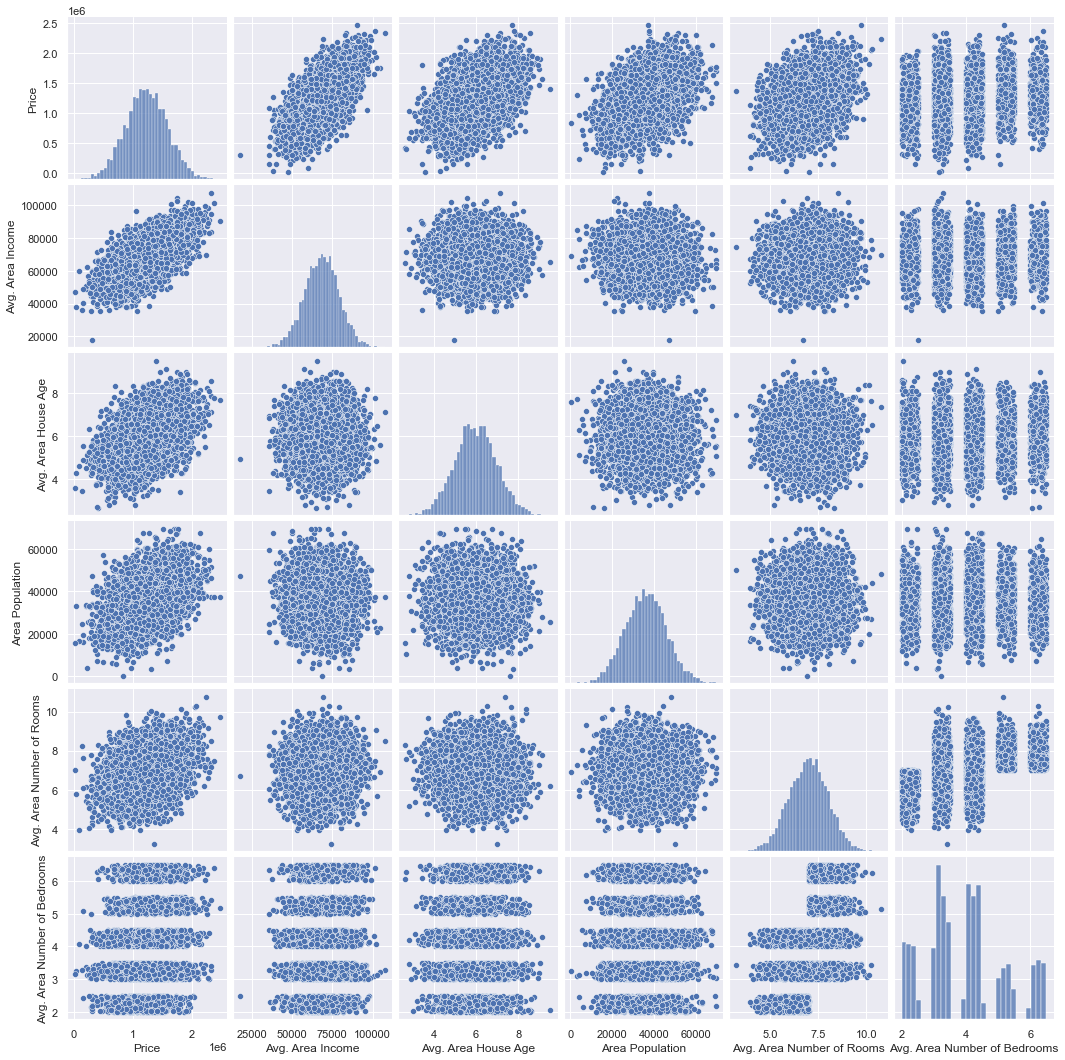

In [62]:
sns.set()
sns.pairplot(df_usa_housing[cols], size = 2.5)
plt.show();

### STEP 03: Data Pre-processing and cleaning [2M]

In [ ]:
# Do the appropriate pre-processing of the data like identifying NULL or Missing
# Values if any, handling of outliers if present in the dataset, skewed data etc.
# Mention the pre-processing steps performed in the markdown cell. Explore few
# latest data balancing tasks and its effect on model evaluation parameters.

In [65]:
## Missing values
total = df_usa_housing.isnull().sum().sort_values(ascending=False)
percent = (df_usa_housing.isnull().sum()/df_usa_housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Avg. Area Income,0,0.00
Avg. Area House Age,0,0.00
Avg. Area Number of Rooms,0,0.00
Avg. Area Number of Bedrooms,0,0.00
Area Population,0,0.00
Price,0,0.00
Address,0,0.00


- No Missing values in data

<AxesSubplot:>

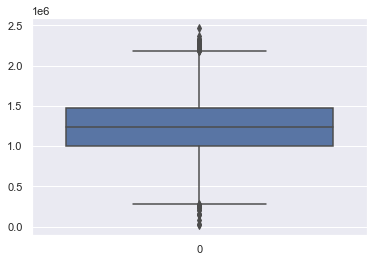

In [74]:
## Outliers

sns.boxplot(data=df_usa_housing['Price'])

In [86]:
q1, q3= np.percentile(df_usa_housing['Price'], [25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
outlier_col_age = df_usa_housing[(df_usa_housing['Price'] < lower_bound) | (df_usa_housing['Price'] > upper_bound)]
# outlier_col_age = outlier_col_age.reset_index()
# outlier_col_age.index
df_after_outlier = df_usa_housing[~df_usa_housing.index.isin(outlier_col_age.index)]
print("Before dropping outliers, no fo rows: {}".format(df_usa_housing.shape[0]))
print("After dropping outliers, no fo rows: {}".format(df_after_outlier.shape[0]))

Before dropping outliers, no fo rows: 5000
After dropping outliers, no fo rows: 4965


- IQR (InterQuartile Range): we look at which data points are outside the whiskers.

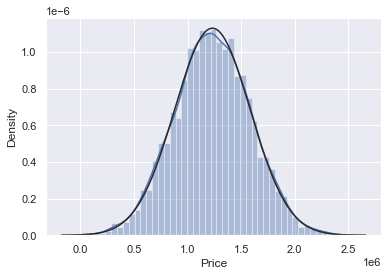

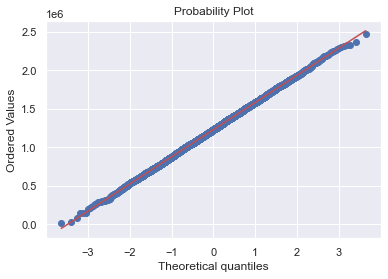

In [69]:
## Skewness

#histogram and normal probability plot
sns.distplot(df_usa_housing['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_usa_housing['Price'], plot=plt)


- Price is normally distributed, it follows diagonal line. But if say data have positive skewness, log transformations usually works well.

In [ ]:
#  Apply appropriate feature engineering techniques for them. Apply the feature
# transformation techniques like Standardization, Normalization, etc. You are free
# to apply the appropriate transformations depending upon the structure and the
# complexity of your dataset. Provide proper justification. Techniques used
# without justification will not be awarded marks

- **Normalization**
    * X_new = (X - X_min)/(X_max - X_min)
    * It is used when features are of different scales.
    * Scales values between [0, 1] or [-1, 1].	
    * It is really affected by outliers.
    * It is useful when we don’t know about the distribution	
    
- **Standardization**
    * X_new = (X - mean)/Std
    * It is used when we want to ensure zero mean and unit standard deviation.
    * It is not bounded to a certain range.
    * It is much less affected by outliers.
    * It is useful when the feature distribution is Normal or Gaussian.





### STEP 04: Model Building [5M]

In [ ]:
# 1. Split the dataset into training and test sets. Answer without justification will
# not be awarded marks. [1M]
#     a) Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ;
#     [ x_test1,y_test1] = 20% ;
#     b) Also, try to split the dataset with different ratios of your choice.

In [92]:
features = ['Avg. Area Income', 'Avg. Area House Age', 'Area Population',\
            'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']
X = df_usa_housing[features]
Y = df_usa_housing['Price']

# random state used to reproduce results, train-80% and test-20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)
print("No of rows in train: {}".format(x_train.shape[0]))
print("No of rows in test: {}".format(x_test.shape[0]))

No of rows in train: 4000
No of rows in test: 1000


In [ ]:
# 2.Explore k-fold cross validation. [1M]

In [ ]:
# 3. Build Model/s using Linear Regression (sklearn or other libraries can be used)
# [3M]

In [98]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train,y_train)

print("The R^2 score value on train is : " + str(pipe.score(x_train,y_train)))
print("The R^2 score value on test is : " + str(pipe.score(x_test,y_test)))
# print("The R^2 score value on train is : " + str(pipe.score(X,Y)))

The R^2 score value on train is : 0.9179787435623722
The R^2 score value on test is : 0.9179971706834331


### STEP 05: Performance Evaluation [2 M]